In [1]:
import pandas as pd
import csv
import numpy as np
import xgboost as xgb
import keyboard
import pyautogui
import time
from PIL import Image, ImageShow
import os
from mss import mss
import tensorflow as tf
from tensorflow.keras import regularizers

In [2]:
data_as_array = np.zeros((827, 220, 450))

In [3]:
# for files in os.listdir("C://Users/Ceyhun/Desktop/Dino2/"):
#     image = Image.open(f"C://Users/Ceyhun/Desktop/Dino2/{files}")
#     image_bw = image.convert("L")
#     image_bw.save(f"C://Users/Ceyhun/Desktop/Dino2Bw/{files}")

In [4]:
path_of_the_directory2 = "C://Users/Ceyhun/Desktop/SkyNet/Documents/Dino2Bw/"
counter = 0

for files in os.listdir(path_of_the_directory2):
    
    image_file = Image.open(f"{path_of_the_directory2}/{files}")
    data_as_array[counter] = np.array(image_file)
    counter += 1

In [5]:
None_y = np.zeros((194, 1))
Up_y = np.ones((633, 1))
y_train = np.vstack((None_y, Up_y))

In [6]:
y_train.shape

(827, 1)

In [17]:
def ConvNet(input_shape):
    
    input_data = tf.keras.Input(shape=input_shape)
    
    A1 = tf.keras.layers.Conv1D(filters=16, kernel_size=(3), activation="relu")(input_data)
    P1 = tf.keras.layers.MaxPooling1D(pool_size=(2), padding="same")(A1)
    
    A2 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation="relu")(P1)
    P2 = tf.keras.layers.MaxPooling1D(pool_size=(2), padding="same")(A2)
    
    A3 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), activation="relu")(P2)
    P3 = tf.keras.layers.MaxPooling1D(pool_size=(2), padding="same")(A3)
    
    F = tf.keras.layers.Flatten()(P3)
    F1 = tf.keras.layers.Dense(units=128, activation="relu")(F)
    D = tf.keras.layers.Dropout(0.5)(F1)
    
    outputs = tf.keras.layers.Dense(units=1, activation="sigmoid")(D)
    
    model = tf.keras.Model(inputs=input_data, outputs=outputs)
    return model

In [18]:
model = ConvNet((220, 450))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
data_as_array /= 255

In [20]:
data_as_array.shape

(827, 220, 450)

In [21]:
np.random.seed(131)

In [22]:
history = model.fit(x=data_as_array, y=y_train, epochs=100, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 30ms/step - loss: 0.4603 - accuracy: 0.6959 - val_loss: 0.0352 - val_accuracy: 1.0000
Epoch 2/100
21/21 [==============================] - 0s 19ms/step - loss: 0.2234 - accuracy: 0.8411 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 3/100
21/21 [==============================] - 0s 19ms/step - loss: 0.1372 - accuracy: 0.9939 - val_loss: 0.0179 - val_accuracy: 0.9819
Epoch 4/100
21/21 [==============================] - 0s 19ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 0.0223 - val_accuracy: 0.9940
Epoch 5/100
21/21 [==============================] - 0s 19ms/step - loss: 0.0607 - accuracy: 0.9834 - val_loss: 0.0156 - val_accuracy: 0.9819
Epoch 6/100
21/21 [==============================] - 0s 19ms/step - loss: 0.0455 - accuracy: 0.9909 - val_loss: 8.5818e-06 - val_accuracy: 1.0000
Epoch 7/100
21/21 [==============================] - 0s 20ms/step - loss: 0.0356 - accuracy: 0.9985 - val_loss: 9.6096e-06 - val_accuracy: 1.000

Epoch 57/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0256 - accuracy: 0.9985 - val_loss: 1.0567e-15 - val_accuracy: 1.0000
Epoch 58/100
21/21 [==============================] - 0s 19ms/step - loss: 0.0304 - accuracy: 0.9985 - val_loss: 2.1331e-15 - val_accuracy: 1.0000
Epoch 59/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0308 - accuracy: 0.9985 - val_loss: 3.2326e-16 - val_accuracy: 1.0000
Epoch 60/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0174 - accuracy: 0.9985 - val_loss: 3.5665e-16 - val_accuracy: 1.0000
Epoch 61/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0241 - accuracy: 0.9985 - val_loss: 6.0706e-16 - val_accuracy: 1.0000
Epoch 62/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0155 - accuracy: 0.9985 - val_loss: 5.9225e-16 - val_accuracy: 1.0000
Epoch 63/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0158 - accuracy: 0.9985 - val_loss: 1.622

In [23]:
import matplotlib.pyplot as plt

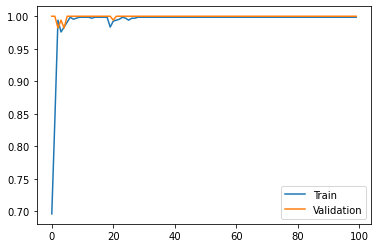

In [24]:
df_loss_acc = pd.DataFrame(history.history)
_ = plt.plot(df_loss_acc["accuracy"], label="Train")
_ = plt.plot(df_loss_acc["val_accuracy"], label="Validation")
plt.legend()

In [25]:
to_predict = np.array(Image.open("C://Users/Ceyhun/Desktop/Dino2Bw/None123.png")).astype(np.float32)
to_predict /= 255
to_predict = np.expand_dims(to_predict, axis=0)

In [26]:
model.predict(to_predict)[0][0]

0.0021938682

In [27]:
to_predict.shape

(1, 220, 450)

In [29]:
time.sleep(3)
ss_manager = mss()
frame = {"top":850, "left":230, "width":450, "height":220}

while True:
    
    time.sleep(0.1)
    
    img = ss_manager.grab(frame)
    
    image = Image.frombytes("RGB", img.size, img.rgb)
    
    img_gray = image.convert("L")
    
    data = np.array(img_gray).astype(np.float32)
    
    data /= 255
    
    to_predict_0 = np.expand_dims(data, axis=0)
    
    prediction = model.predict(to_predict_0)

    if prediction[0][0] >= 0.5:
        
        keyboard.press("up")
        
        print(prediction)
        
    elif keyboard.is_pressed("s"):
        break

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.9999964]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.92907476]]
[[1.]]
[[1.]]
[[1.]]
[[0.93246925]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.